# Student Depression Analysis
前言：  
哈喽，我叫柳橙汁，来自中国，一名研0学生，想在入学前能够学习AI。这是我的第一个机器学习项目。  
本文本的大部分代码都源自于作者BhaskarMishra，他的代码给了我很大的启发，让我意识到原来数据处理这么简单，调用传统的机器学习算法，也可以这么方便。  
而本文的代码，我所做的只是多添加了一些注释，同时添加了一个深度学习的模型，来锻炼我的代码的能力。（如果有冒犯到的地方，请联系我，我一定会及时修改，Thanks♪(･ω･)ﾉ）  

​​Preface:​​  
Hi there! My name is Cjuicy (Liuchengzhi), from China, an incoming graduate student aiming to dive into AI before officially starting my program. This marks my very first machine learning project.  
The majority of the code in this work is adapted from author BhaskarMishra, whose original implementation inspired me profoundly—it revealed how streamlined data processing can be, and how accessible traditional machine learning algorithms can become.  
In this codebase, I’ve primarily added detailed annotations and integrated a deep learning model to sharpen my coding skills. (If any part inadvertently causes concern, please reach out—I’ll address it promptly. Thank you! ♪(･ω･)ﾉ)  
  
    
学生抑郁症分析任务：通过一些特征，来尝试分析出学生是否有抑郁症  
分析：此问题为一个二分类问题，即给定一些特征，判断学生是否抑郁症即可，作为我的第一个机器学习项目。  
想法：尝试使用Pytorch构建神经网络，参考之前学的二分类基础模型代码，尝试进行训练构建。  
  
**Task**:  
Student Depression Analysis​​  
​**​Objective**:​​  
Predict whether a student has depression based on given features.  
​​**Analysis**:​​  
This is a ​​binary classification problem​​, where the goal is to determine a student's depression status (depressed or not) using feature inputs. As my first machine learning project, it serves as an entry point to apply foundational concepts in a real-world scenario.  
​**​Approach**:​​  
I aim to build a neural network using ​​PyTorch​​, drawing on foundational code from binary classification models studied earlier.
  
结果：  
最后我的神经网络模型准确率和机器学习的准确率基本一致，没有显著差异。o(╥﹏╥)o  
final result：  
The accuracy of my neural network model is almost the same as the accuracy of machine learning models studied earlier. o(╥﹏╥)o

## 0. 导入必要的依赖包和设置一些基本设置 (importing necessary packages and setting up some basic settings)

In [62]:
# 导入PyTorch (import torch)
import torch
# 导入数据处理依赖包 (import data set package)
import pandas as pd

# 设置使用CUDA 还是 CPU进行训练（这里可以只用CPU训练）
# set the device to CUDA if available, otherwise use CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# 设置随机种子，确保结果可复现
# set the random seed for reproducibility
RANDOM_SEED = 42

import kagglehub
adilshamim8_student_depression_dataset_path = kagglehub.dataset_download('adilshamim8/student-depression-dataset')
print('Data source import complete.')


Data source import complete.


## 1. 数据处理
读取CSV文件  

In [63]:
# 加载数据集(读取SCV文件)
# load the dataset (read the CSV file) 
df = pd.read_csv('./Data/archive/student_depression_dataset.csv')
df.head() # 显示前五行(show the first five rows)

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,'5-6 hours',Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,'5-6 hours',Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,'Less than 5 hours',Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,'7-8 hours',Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,'5-6 hours',Moderate,M.Tech,Yes,1.0,1.0,No,0


### 1.1 数据处理(data preprocessing)  

In [64]:
# 基础统计信息（basic statistics）
print("数据集的基本统计信息(basic statistics)：") 
print(df.describe())
print("数据集名称，行数，数值，类型(dataset name, rows, values, types)：")
print(df.info()) # 显示数据集的信息，包括数据类型和缺失值情况(show the dataset information, including data types and missing values)

数据集的基本统计信息(basic statistics)：
                  id           Age  Academic Pressure  Work Pressure  \
count   27901.000000  27901.000000       27901.000000   27901.000000   
mean    70442.149421     25.822300           3.141214       0.000430   
std     40641.175216      4.905687           1.381465       0.043992   
min         2.000000     18.000000           0.000000       0.000000   
25%     35039.000000     21.000000           2.000000       0.000000   
50%     70684.000000     25.000000           3.000000       0.000000   
75%    105818.000000     30.000000           4.000000       0.000000   
max    140699.000000     59.000000           5.000000       5.000000   

               CGPA  Study Satisfaction  Job Satisfaction  Work/Study Hours  \
count  27901.000000        27901.000000      27901.000000      27901.000000   
mean       7.656104            2.943837          0.000681          7.156984   
std        1.470707            1.361148          0.044394          3.707642   
min  

#### 1.1.1 EDA Exploratory Data Analysis 探索性数据分析
为系统性探索数据特征的过程  
目标包括：  
1. 理解数据分布（如数值范围、类别平衡）
2. 识别数据问题（缺失值，异常值，重复数据）  
3. 发现潜在模式（特征间相关性、聚类趋势）  
4. 指导清洗策略（决定如何处理缺失或异常）  

|    操作类型    |         工具/方法         |              目的              |
| :------------: | :-----------------------: | :----------------------------: |
|   缺失值分析   |     `.isnull().sum()`     |         统计各列缺失率         |
|   异常值检测   |  箱线图（`sns.boxplot`）  |     识别超出合理范围的数值     |
| 数据分布可视化 |   直方图（`plt.hist`）    |    检查偏态、峰态等分布特征    |
|  类别平衡检查  | 条形图（`sns.countplot`） |       发现类别不平衡问题       |
|  重复数据筛查  |   `.duplicated().sum()`   |           定位重复行           |
| 特征相关性分析 |  热力图（`sns.heatmap`）  | 识别高相关特征，避免多重共线性 |

------
**Objectives Include:**

1. Understand data distributions (e.g., value ranges, class balance)
2. Identify data issues (missing values, outliers, duplicates)
3. Discover latent patterns (feature correlations, clustering tendencies)
4. Guide cleaning strategies (decide how to handle missing/abnormal data)

|      **Operation Type**      |      **Tools/Methods**      |                         **Purpose**                          |
| :--------------------------: | :-------------------------: | :----------------------------------------------------------: |
|    Missing Value Analysis    |      `.isnull().sum()`      |              Calculate missing rates per column              |
|      Outlier Detection       |   Boxplot (`sns.boxplot`)   |           Identify values beyond reasonable ranges           |
|    Data Distribution Viz     |   Histogram (`plt.hist`)    |  Examine distribution characteristics (skewness, kurtosis)   |
|     Class Balance Check      | Bar Chart (`sns.countplot`) |                Detect class imbalance issues                 |
|   Duplicate Data Screening   |    `.duplicated().sum()`    |                   Identify duplicate rows                    |
| Feature Correlation Analysis |   Heatmap (`sns.heatmap`)   | Identify highly correlated features to avoid multicollinearity |

------


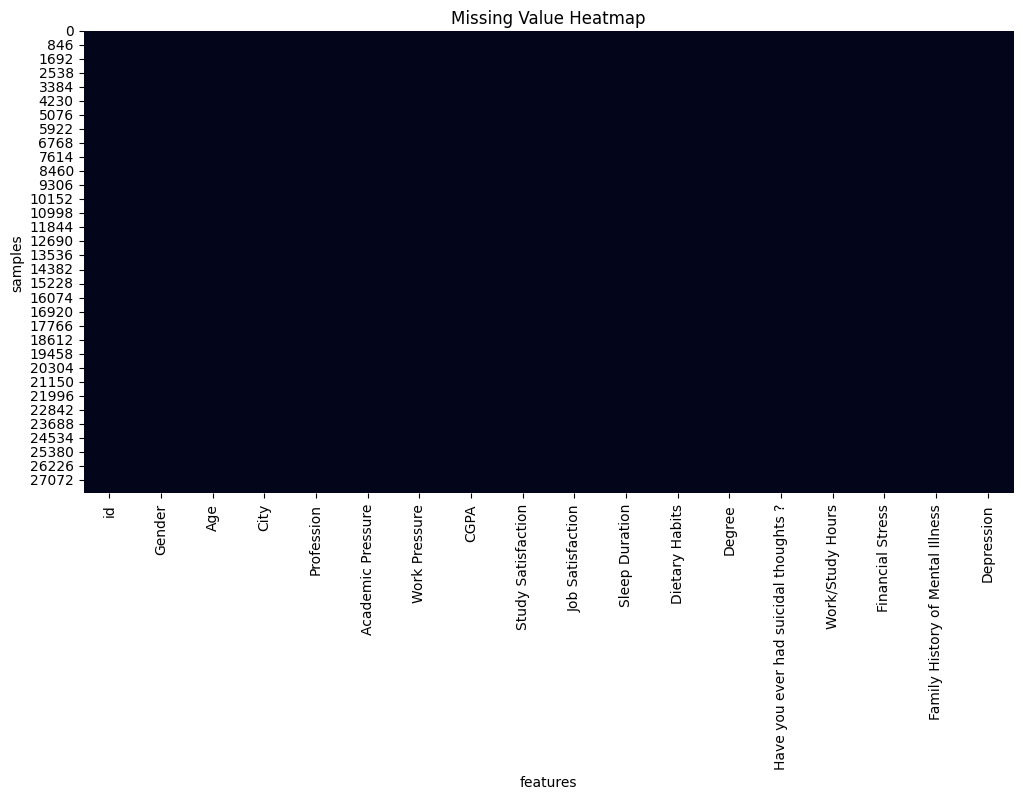

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns


# 设置中文字体（必须在绘图前设置）
# show Chinese font (must be set before plotting)

# plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']
# plt.rcParams['axes.unicode_minus'] = False

# 缺失值分析 (missing value analysis)
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False)
plt.title("Missing Value Heatmap") # 标题：缺失值热力图 (title: Missing Value Heatmap)
plt.xlabel("features") # x轴标签：特征 (x-axis label: features)
plt.ylabel("samples")  # y轴标签：样本 (y-axis label: samples)
plt.show()


['id', 'Age', 'Academic Pressure', 'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction', 'Work/Study Hours', 'Depression']
学术压力与抑郁症的关系(depression and academic pressure)


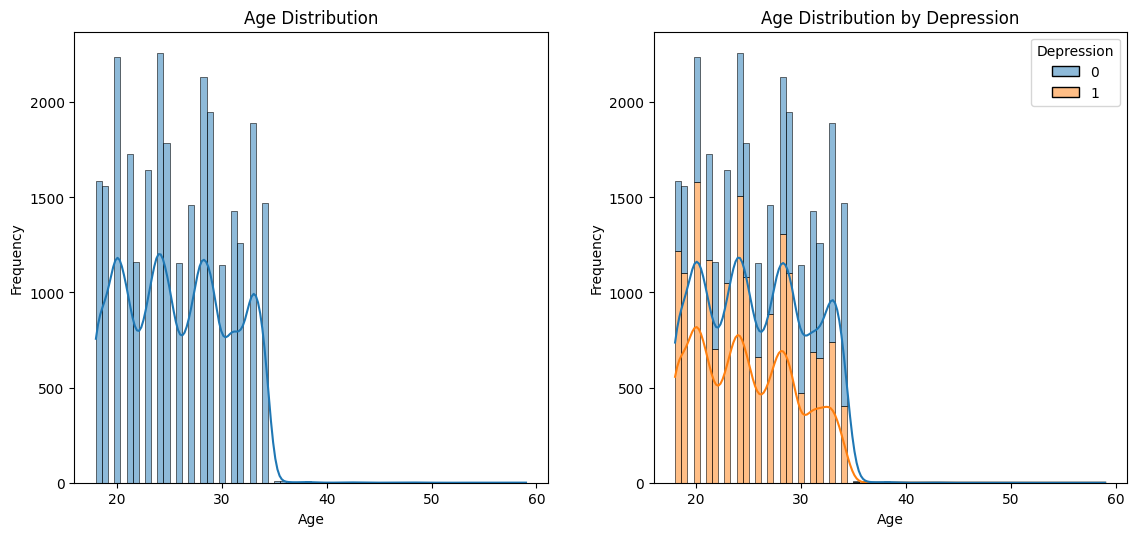

性别与抑郁症的关系 (gender and depression relationship)


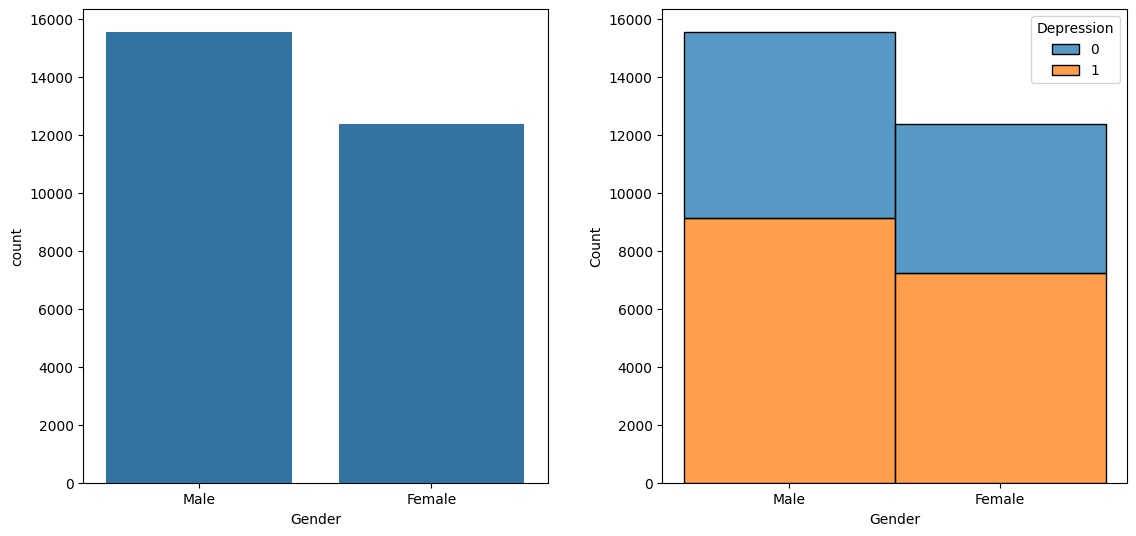

学术压力与抑郁症的关系 (academic pressure and depression relationship)


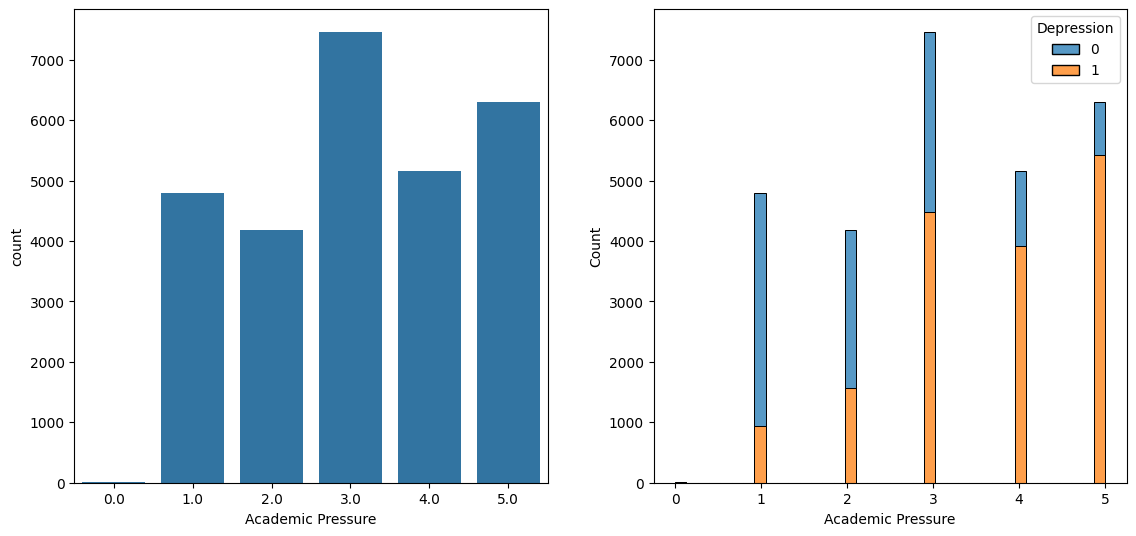

CGPA与抑郁症的关系 (CGPA and depression relationship)


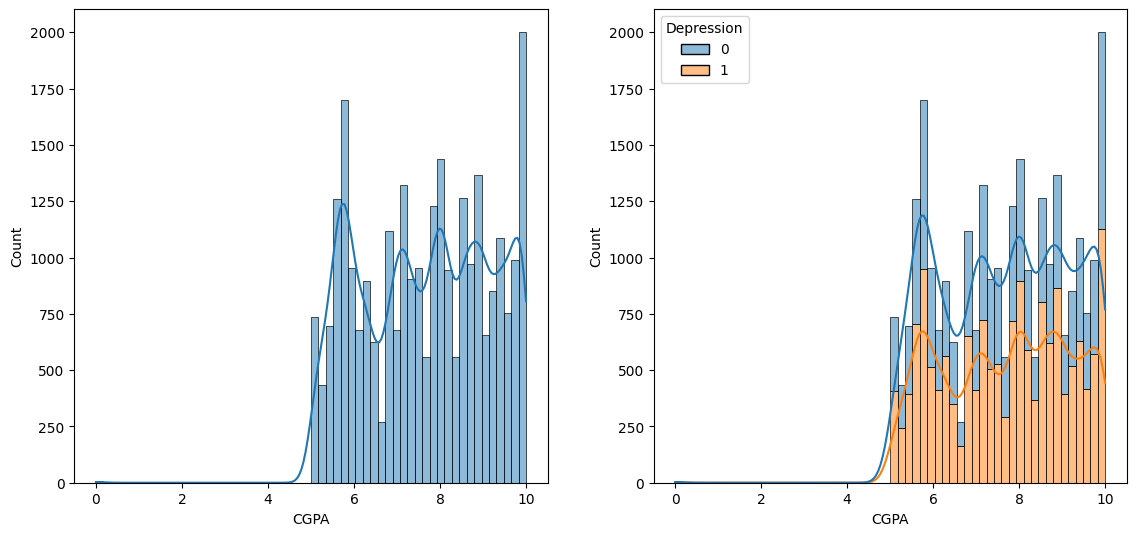

学习满意度与抑郁的关系 (study satisfaction and depression relationship)


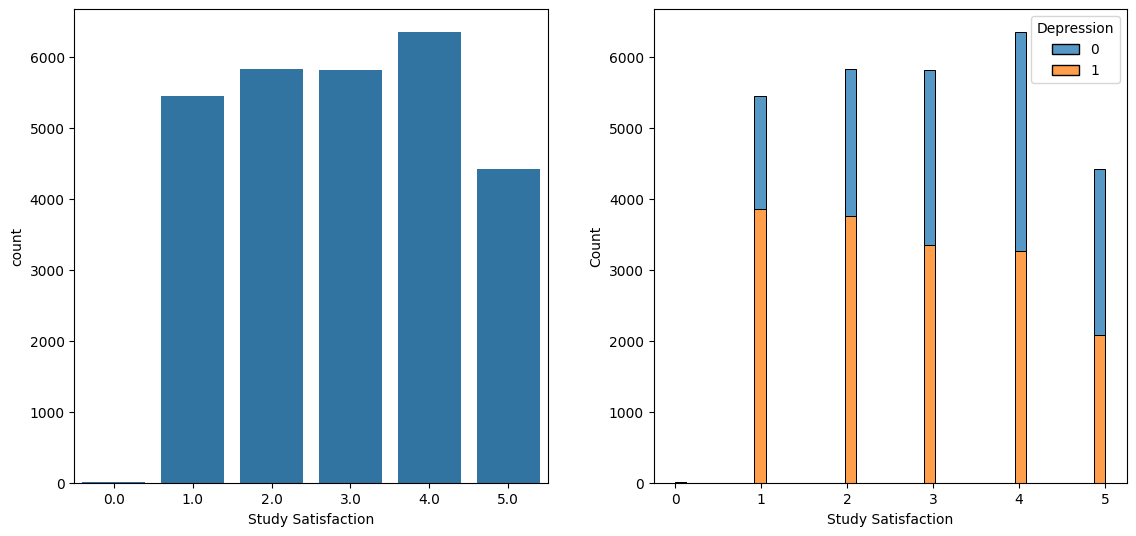

工作/学习时长与抑郁的关系 (work/study hours and depression relationship)


<Axes: xlabel='Work/Study Hours', ylabel='Count'>

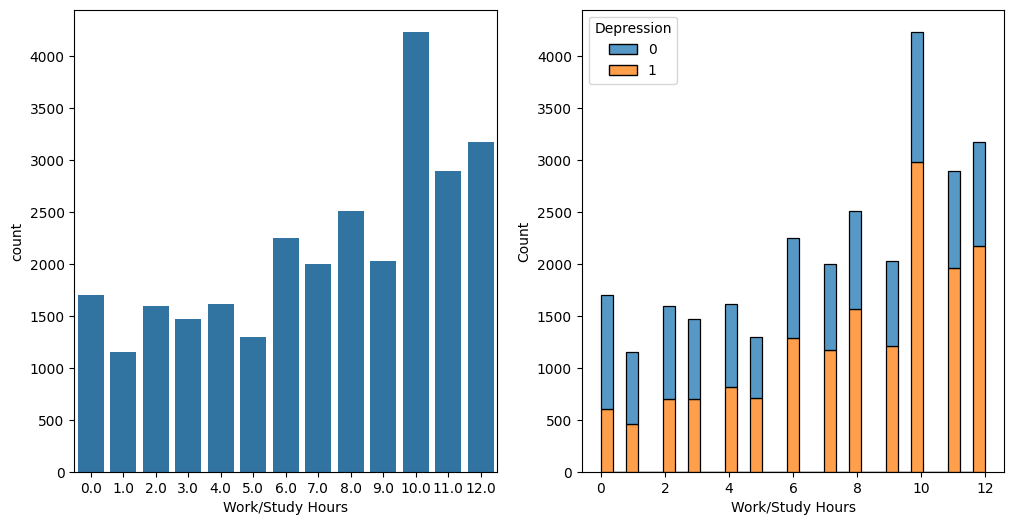

In [66]:
# 分布检测-数据图表(distribution detection - data chart)
# 获取特征为数字的列 (get the columns with numeric features)
num_cols = df.select_dtypes(include=['int64','float64']).columns.tolist()
print(num_cols)


'''
1. 绘制年龄分布图 (Age distribution chart)
'''
print("学术压力与抑郁症的关系(depression and academic pressure)")
# 一张图绘制两张图标 (One chart draws two charts)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
sns.histplot(data=df['Age'],kde=True,ax=ax1 )                                       # 绘制年龄分布图 (draw age distribution chart)
ax1.set_title("Age Distribution")                                                   # 标题：年龄分布 (title: Age Distribution)
ax1.set_xlabel("Age")                                                               # x轴标签：年龄 (x-axis label: Age)
ax1.set_ylabel("Frequency")                                                         # y轴标签：频率 (y-axis label: Frequency)

# 年龄分布-抑郁症分布图 (Age distribution - depression distribution chart)
sns.histplot(data=df, x='Age', hue='Depression', multiple='stack', kde=True, ax=ax2)    # 绘制年龄分布图 (draw age distribution chart)
ax2.set_title("Age Distribution by Depression")                                         # 标题：按抑郁症分布的年龄分布 (title: Age Distribution by Depression)
ax2.set_xlabel("Age")                                                                   # x轴标签：年龄 (x-axis label: Age)
ax2.set_ylabel("Frequency")                                                             # y轴标签：频率 (y-axis label: Frequency)
# 增加两张图片的间距 (increase the spacing between the two images)
plt.tight_layout(pad=3.0)
plt.show()                                                                              # 显示图像 (show the image)


'''
2. 绘制性别分布图
'''
print("性别与抑郁症的关系 (gender and depression relationship)")
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
sns.countplot(data=df, x='Gender', ax=ax1)                                          # 绘制性别分布图 (draw gender distribution chart)
#对比性别与抑郁症的关系 (compare the relationship between gender and depression)
sns.histplot(data=df, x='Gender', hue='Depression',multiple='stack', ax=ax2)
# 增加间距 (increase the spacing)
plt.tight_layout(pad=3.0)
plt.show()                                                                          

'''
3. 绘制学术压力分布图
'''
print("学术压力与抑郁症的关系 (academic pressure and depression relationship)")
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
sns.countplot(data=df, x='Academic Pressure', ax=ax1)                               # 绘制学术压力分布图 (draw academic pressure distribution chart)
#对比学术压力与抑郁症的关系 (compare the relationship between academic pressure and depression)
sns.histplot(data=df, x='Academic Pressure', hue='Depression', multiple='stack',ax=ax2)
# 增加间距 (increase the spacing)
plt.tight_layout(pad=3.0)
plt.show()                                                                          


'''
4. 绘制工作压力分布图（无，工作压力均为0） (draw work pressure distribution chart (none, work pressure is 0))
'''
# print("工作压力与抑郁症的关系")
# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
# sns.countplot(data=df, x='Work Pressure', ax=ax1)
# #对比工作压力与抑郁症的关系
# sns.histplot(data=df, x='Work Pressure', hue='Depression', multiple='stack', ax=ax2)
# # 增加间距
# plt.tight_layout(pad=3.0)
# plt.show() # 显示图像
'''
5. 绘制CGPA分布图 (draw CGPA distribution chart)
'''
print("CGPA与抑郁症的关系 (CGPA and depression relationship)")
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
sns.histplot(data=df, x='CGPA', kde=True, ax=ax1)
sns.histplot(data=df, x='CGPA', hue='Depression', multiple='stack', kde=True, ax=ax2)
# 增加间距 (increase the spacing)
plt.tight_layout(pad=3.0)
plt.show() # 显示图像 (show the image)

'''
6. 绘制学习满意度与抑郁的关系 (draw the relationship between study satisfaction and depression)
'''
print("学习满意度与抑郁的关系 (study satisfaction and depression relationship)")
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
sns.countplot(data=df, x='Study Satisfaction', ax=ax1)
sns.histplot(data=df, x='Study Satisfaction', hue='Depression', multiple='stack', ax=ax2)
# 增加间距
plt.tight_layout(pad=3.0)
plt.show()

'''
7. 绘制工作时长与抑郁的关系 (draw the relationship between working hours and depression)
'''
print("工作/学习时长与抑郁的关系 (work/study hours and depression relationship)") 
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
sns.countplot(data=df, x='Work/Study Hours', ax=ax1)
sns.histplot(data=df, x='Work/Study Hours', hue='Depression', multiple='stack', ax=ax2)

['Gender', 'City', 'Profession', 'Sleep Duration', 'Dietary Habits', 'Degree', 'Have you ever had suicidal thoughts ?', 'Financial Stress', 'Family History of Mental Illness']


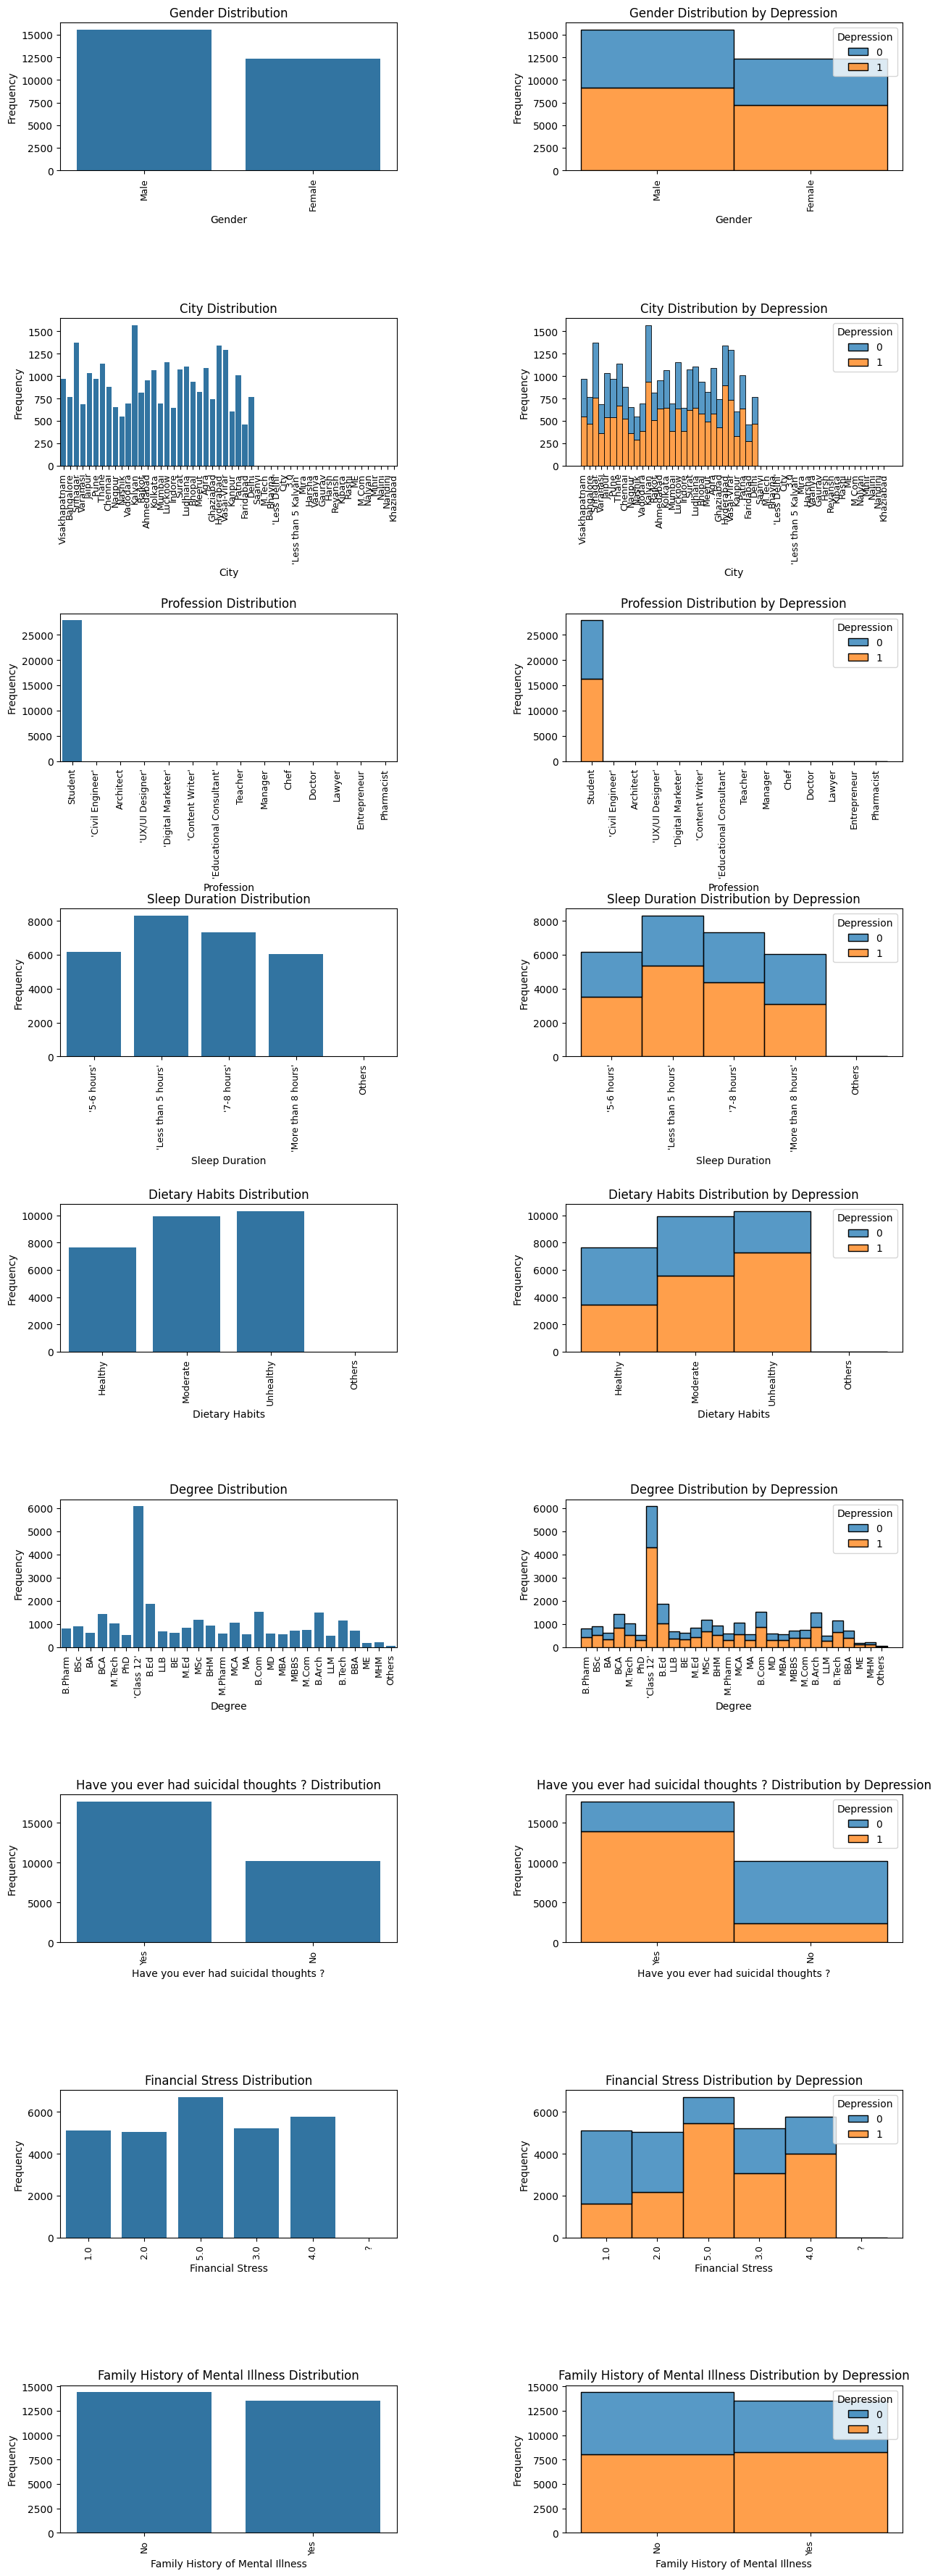

In [67]:
# 类别分析 (category analysis)
# 获取类别数据列 (get the category data column)
cat_clos = df.select_dtypes(include=['object']).columns.to_list()
print(cat_clos)

# 获取类别数据列的数量，通过遍历循环绘制图表 (get the number of category data columns, draw charts by traversing loops)
rows = len(cat_clos)
fig, axes = plt.subplots(rows, 2, figsize=(15, 5 * rows))
for i, col in enumerate(cat_clos):
    # 绘制类别分布图 (draw category distribution chart)
    sns.countplot(data=df, x=col, ax=axes[i][0])
    axes[i][0].set_title(f"{col} Distribution")                 # 标题：类别分布图 (title: Category Distribution)
    axes[i][0].tick_params(axis='x', rotation=90, labelsize=9)  # x轴标签旋转90度，字体大小9,解决标签重叠问题 (x-axis label rotated 90 degrees, font size 9, solve the label overlap problem)
    axes[i][0].set_xlabel(col)                                  # x轴标签：类别 (x-axis label: category)
    axes[i][0].set_ylabel("Frequency")                          # y轴标签：频率 (y-axis label: frequency)

    # 图表间隔 设置 (chart interval setting)
    plt.subplots_adjust(hspace=1)
    plt.subplots_adjust(wspace=0.5)

    # 绘制类别与抑郁症的关系图 (draw the relationship between category and depression)
    sns.histplot(data=df, x=col, hue='Depression', multiple='stack', ax=axes[i][1])
    axes[i][1].set_title(f"{col} Distribution by Depression")                       # 标题：按抑郁症分布的类别分布图 (title: Category Distribution by Depression)
    axes[i][1].tick_params(axis='x', rotation=90, labelsize=9)                      # x轴标签旋转90度，字体大小9,解决标签重叠问题 (x-axis label rotated 90 degrees, font size 9, solve the label overlap problem)   
    axes[i][1].set_xlabel(col )                                                     # x轴标签：类别 (x-axis label: category)
    axes[i][1].set_ylabel("Frequency")                                              # y轴标签：频率 (y-axis label: frequency)


## 2. 构建模型 (Build Model)

### 2.1 机器学习模型 (Machine Learning Model)

#### 2.1.1  决策树分类模型 (Decision Tree Classifier)

In [69]:
'''
使用决策树对数据进行预测 (use decision tree to predict data)
'''
#导入sklearn库，用于数据预处理(import sklearn library for data preprocessing)
from sklearn.model_selection import train_test_split
# 拆分特征和标签 (split features and labels)
x=df.drop('Depression',axis=1)
y=df['Depression']
# 获取数值型和分类型数据 列 (get numeric and categorical data columns)
num_cols=x.select_dtypes(include=['int64','float64']).columns.tolist()
cat_cols=x.select_dtypes(include=['object']).columns.tolist()
# 拆分数据集为训练集和测试集 (split the dataset into training and testing sets)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# 数据预处理，导入包 (import package)
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer
# 数据预处理 (data preprocessing)
# ColumnTransformer用于对不同类型的数据进行不同的预处理(适用于混合数据类型的数据集)     (ColumnTransformer is used to preprocess different types of data with different methods (suitable for mixed data types))
# StandardScaler用于数值型数据的标准化 （适用标准化方法对数值型数据进行标准化）         (StandardScaler is used to standardize numerical data)
# OneHotEncoder用于分类型数据的独热编码 （适用独热编码对分类型数据进行编码）            (OneHotEncoder is used to one-hot encode categorical data)
# OneHotEncoder(drop='first')用于避免虚拟变量陷阱（避免多重共线性）（线性回归等模型必须）(OneHotEncoder(drop='first') is used to avoid the dummy variable trap (avoid multicollinearity) (linear regression and other models must use it))
# handle_unknown='ignore'用于处理未知类别（避免错误）                                (handle_unknown='ignore' is used to handle unknown categories (avoid errors)) 
# 原始数据 → [数值列: 标准化] + [分类列: 独热编码] → 合并后的特征矩阵                  (original data → [numeric columns: standardization] + [categorical columns: one-hot encoding] → merged feature matrix)
preprocessing = ColumnTransformer([('scaler',StandardScaler(),num_cols),
                                  ('encoder',OneHotEncoder(drop='first',handle_unknown='ignore'),cat_cols)])

# 训练模型 (使用管道)                  (train the model (use pipeline))
# 导入sklearn库，用于模型训练和评估     (import sklearn library for model training and evaluation)
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
model=Pipeline([('pre',preprocessing),
               ('model',DecisionTreeClassifier())])
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
print(f'Accuracy Score: {accuracy_score(y_test,y_pred) *100 :.2f}')

Accuracy Score: 75.52


c:\Users\22336\anaconda3\envs\AI\lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [1, 2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


#### 2.1.2 其他模型进行分类

In [70]:
# 数据处理（同上） ( data processing (same as above))
from sklearn.model_selection import train_test_split
x=df.drop('Depression',axis=1)
y=df['Depression']
num_cols=x.select_dtypes(include=['int64','float64']).columns.tolist()
cat_cols=x.select_dtypes(include=['object']).columns.tolist()
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer
preprocessing = ColumnTransformer([('scaler',StandardScaler(),num_cols),
                                  ('encoder',OneHotEncoder(drop='first',handle_unknown='ignore'),cat_cols)])

# 导入各种模型 (Import various models)
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier

models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Classifier': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}

# 遍历使用，依次进行评估 (evaluate one by one)
from sklearn.pipeline import Pipeline
results={}
for name,model in models.items():
    pipeline=Pipeline([('pre',preprocessing),
                      ('model',model)])
    pipeline.fit(x_train,y_train)
    y_pred=pipeline.predict(x_test)
    acc=accuracy_score(y_test,y_pred)
    results[name]=acc
    print(f'Accuracy score for {name} is {acc *100 :.2f}')

c:\Users\22336\anaconda3\envs\AI\lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [1, 2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Accuracy score for Logistic Regression is 83.95


c:\Users\22336\anaconda3\envs\AI\lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [1, 2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Accuracy score for Decision Tree is 75.15


c:\Users\22336\anaconda3\envs\AI\lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [1, 2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Accuracy score for Random Forest is 82.67


c:\Users\22336\anaconda3\envs\AI\lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [1, 2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Accuracy score for Support Vector Classifier is 83.39


c:\Users\22336\anaconda3\envs\AI\lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [1, 2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Accuracy score for K-Nearest Neighbors is 79.82
Accuracy score for Gradient Boosting is 84.00


c:\Users\22336\anaconda3\envs\AI\lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [1, 2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


### 2.2 深度学习模型

In [71]:
# 内容同上，数据预处理部分相同 (data preprocessing part is the same)
from sklearn.model_selection import train_test_split
x=df.drop('Depression',axis=1)
y=df['Depression']
num_cols=x.select_dtypes(include=['int64','float64']).columns.tolist()
cat_cols=x.select_dtypes(include=['object']).columns.tolist()
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer
preprocessing = ColumnTransformer([('scaler',StandardScaler(),num_cols),
                                  ('encoder',OneHotEncoder(drop='first',handle_unknown='ignore'),cat_cols)])



In [72]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import numpy as np

# 1. 数据预处理并转换为PyTorch张量 ============================== (data preprocessing and convert to PyTorch tensor)
# 应用预处理到训练和测试数据集 (apply preprocessing to training and testing datasets)
X_train_processed = preprocessing.fit_transform(x_train)
X_test_processed = preprocessing.transform(x_test)

# 转换为密集数组（如果使用稀疏矩阵需特殊处理）                      (convert to dense array (if using sparse matrix, special handling))
X_train_dense = X_train_processed.toarray() if hasattr(X_train_processed, "toarray") else X_train_processed
X_test_dense = X_test_processed.toarray() if hasattr(X_test_processed, "toarray") else X_test_processed

# 转换为PyTorch张量                                              (convert to PyTorch tensor)
X_train_tensor = torch.tensor(X_train_dense, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).unsqueeze(1)  # BCE需要float类型 (二分类) 
X_test_tensor = torch.tensor(X_test_dense, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).unsqueeze(1)

# 2. 创建PyTorch数据集 ======================================== (create PyTorch dataset)
class DepressionDataset(Dataset):
    def __init__(self, features, labels):
        self.features = features
        self.labels = labels
        
    def __len__(self):
        return len(self.labels)
    
    def __getitem__(self, idx):
        return self.features[idx], self.labels[idx]

train_dataset = DepressionDataset(X_train_tensor, y_train_tensor)
test_dataset = DepressionDataset(X_test_tensor, y_test_tensor)

BATCH_SIZE = 32
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE)

# 3. 定义神经网络模型 ======================================== (define neural network model)
class DepressionClassifier(nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, 64),
            nn.Sigmoid(),
            nn.Dropout(0.3),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 1)
        )
        
    def forward(self, x):
        return self.net(x)

# 获取输入维度（处理后的特征数）                                (get input dimension (number of processed features))
input_dim = X_train_tensor.shape[1]
model = DepressionClassifier(input_dim)

# 4. 训练配置 =============================================== (Training configuration)
device = "cuda" if torch.cuda.is_available() else "cpu"
model.to(device)

loss_fn = nn.BCEWithLogitsLoss()  # 自动包含sigmoid           (Sigmoid included)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-4)

# 5. 训练循环 ================================================ (training loop)
EPOCHS = 20

for epoch in range(EPOCHS):
    # 训练阶段 (training phase)
    model.train()
    train_loss, correct = 0, 0
    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        
        # 前向传播 (forward pass)
        y_pred = model(X_batch)
        loss = loss_fn(y_pred, y_batch)
        
        # 反向传播 (backward pass)
        optimizer.zero_grad()
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)  # 梯度裁剪
        optimizer.step()
        
        # 统计指标 (accuracy)
        train_loss += loss.item()
        predicted = torch.sigmoid(y_pred) > 0.5
        correct += (predicted == y_batch).sum().item()
    
    # 验证阶段 (validation phase)
    model.eval()
    test_loss, test_correct = 0, 0
    with torch.no_grad():
        for X_batch, y_batch in test_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            y_pred = model(X_batch)
            test_loss += loss_fn(y_pred, y_batch).item()
            predicted = torch.sigmoid(y_pred) > 0.5
            test_correct += (predicted == y_batch).sum().item()
    
    # 输出指标和损失 (output metrics and loss)
    train_acc = correct / len(train_dataset)
    test_acc = test_correct / len(test_dataset)
    if epoch % 1 == 0:
        print(f"Epoch {epoch:2}: "
              f"Train Loss: {train_loss/len(train_loader):.4f} | Acc: {train_acc:.2%} | "
              f"Test Loss: {test_loss/len(test_loader):.4f} | Test Acc: {test_acc:.2%}")

# 最终评估 ================================= (final evaluation)
model.eval()
with torch.no_grad():
    y_probs = torch.sigmoid(model(X_test_tensor.to(device)))
    y_pred = (y_probs > 0.5).float().cpu()
    final_acc = (y_pred == y_test_tensor).float().mean()
print(f"\nFinal Test Accuracy: {final_acc:.2%}")

c:\Users\22336\anaconda3\envs\AI\lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [1, 2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Epoch  0: Train Loss: 0.4695 | Acc: 77.07% | Test Loss: 0.3761 | Test Acc: 83.25%
Epoch  1: Train Loss: 0.3761 | Acc: 83.73% | Test Loss: 0.3740 | Test Acc: 83.37%
Epoch  2: Train Loss: 0.3660 | Acc: 83.92% | Test Loss: 0.3706 | Test Acc: 83.64%
Epoch  3: Train Loss: 0.3653 | Acc: 84.18% | Test Loss: 0.3699 | Test Acc: 83.64%
Epoch  4: Train Loss: 0.3604 | Acc: 84.44% | Test Loss: 0.3702 | Test Acc: 83.75%
Epoch  5: Train Loss: 0.3601 | Acc: 84.44% | Test Loss: 0.3724 | Test Acc: 83.69%
Epoch  6: Train Loss: 0.3568 | Acc: 84.64% | Test Loss: 0.3686 | Test Acc: 83.89%
Epoch  7: Train Loss: 0.3560 | Acc: 84.66% | Test Loss: 0.3727 | Test Acc: 83.52%
Epoch  8: Train Loss: 0.3567 | Acc: 84.62% | Test Loss: 0.3687 | Test Acc: 83.96%
Epoch  9: Train Loss: 0.3551 | Acc: 84.53% | Test Loss: 0.3705 | Test Acc: 83.48%
Epoch 10: Train Loss: 0.3545 | Acc: 84.67% | Test Loss: 0.3685 | Test Acc: 83.93%
Epoch 11: Train Loss: 0.3562 | Acc: 84.62% | Test Loss: 0.3700 | Test Acc: 83.66%
Epoch 12: Train 

最终预测结果准确率停留在 83.8%左右。
finally, we get the final prediction accuracy around 83.8%.